**classification using Support Vector Machine**

In [1]:
#data preprocessing for training set
#reinforcement
from PIL import Image
import numpy as np
binimg=[]
except_indx=[]
count=0
# Read Image 
for i in range(1,125):
    try:
        im = Image.open(f'C:\\Users\\HP\\Desktop\\python\\combined_data\\rebar\\{i}.png')
        im=im.resize((200,200))
        im = np.array(im)
        binimg.append(np.array(Image.fromarray(im)))
        count+=1
    except OSError:
        pass

In [2]:
len(binimg)

97

In [3]:
#data normalization
binimg=np.array(binimg)
binimg_scaled=[]
for img in binimg:
    img=img/255.0
    binimg_scaled.append(img)
binimg_scaled=np.array(binimg_scaled)

(97, 200, 200)


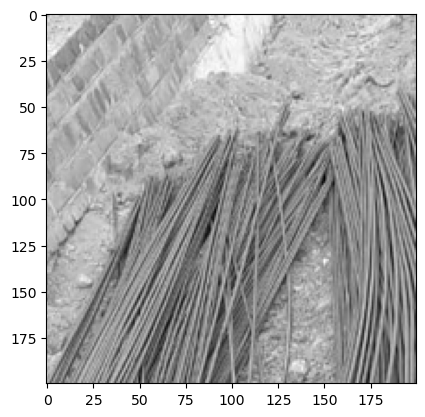

In [4]:
import matplotlib.pyplot as plt
i=np.random.randint(0,99)
plt.imshow(binimg_scaled[i],cmap='gray')
print(binimg_scaled.shape)

In [13]:
#training set formation
import numpy as np
Y=np.ones(binimg_scaled.shape[0])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(binimg_scaled,Y,train_size=0.75)
X_train=X_train.reshape(X_train.shape[0],(X_train.shape[1]*X_train.shape[2]))
X_test=X_test.reshape(X_test.shape[0],(X_test.shape[1]*X_test.shape[2]))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(72, 40000)
(72,)
(25, 40000)
(25,)


In [6]:
#data preprocessing for training set
#debris
from PIL import Image
import numpy as np
binimg1=[]
except_indx=[]
count=0
# Read Image 
for i in range(1,238):
    try:
        im = Image.open(f'C:\\Users\\HP\\Desktop\\python\\combined_data\\debris\\{i}.png')
        im=im.resize((200,200))
        im = np.array(im)
        binimg1.append(np.array(Image.fromarray(im)))
        count+=1
    except OSError:
        pass

In [9]:
binimg1[0].shape

(200, 200)

In [10]:
#data normalization
binimg1=np.array(binimg1)
binimg_scaled1=[]
for img in binimg1:
    img=img/255.0
    binimg_scaled1.append(img)
binimg_scaled1=np.array(binimg_scaled1)

In [11]:
binimg_scaled1.shape

(103, 200, 200)

In [12]:
#training set formation
import numpy as np
Y1=np.zeros(binimg_scaled1.shape[0])
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(binimg_scaled1,Y1,train_size=0.7)
X_train1=X_train1.reshape(X_train1.shape[0],(X_train1.shape[1]*X_train1.shape[2]))
X_test1=X_test1.reshape(X_test1.shape[0],(X_test1.shape[1]*X_test1.shape[2]))
print(X_train1.shape)
print(Y_train1.shape)
print(X_test1.shape)
print(Y_test1.shape)


(72, 40000)
(72,)
(31, 40000)
(31,)


In [14]:
#data concatination and shuffling
X_train_f=np.concatenate((X_train,X_train1))
Y_train_f=np.concatenate((Y_train,Y_train1))
X_test_f=np.concatenate((X_test,X_test1))
Y_test_f=np.concatenate((Y_test,Y_test1))
from sklearn.utils import shuffle
X_train_f,Y_train_f=shuffle(X_train_f,Y_train_f,random_state=0)
X_test_f,Y_test_f=shuffle(X_test_f,Y_test_f,random_state=0)

In [15]:
X_test_f.shape

(56, 40000)

In [16]:
Y_test_f.shape

(56,)

In [23]:
#model (random forrest)
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=200)
model1.fit(X_train_f,Y_train_f)

RandomForestClassifier(n_estimators=200)

In [22]:
param_grid = {'n_estimators': [50,100,200],
              'max_depth': [None, 5, 10],}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(random_state=0)

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_f, Y_train_f)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'n_estimators': 200}
Best score:  0.7157635467980294


In [31]:
df1=pd.DataFrame(grid_search.cv_results_)
df1[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,50,0.660591
1,100,0.695074
2,200,0.715764
3,50,0.660591
4,100,0.695074
5,200,0.715764
6,50,0.660591
7,100,0.695074
8,200,0.715764


In [36]:
df1.sort_values(by='rank_test_score',ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.198657,0.226282,0.054486,0.016445,None,200,"{'max_depth': None, 'n_estimators': 200}",0.620690,0.689655,0.758621,0.724138,0.785714,0.715764,0.057482,1
5,2.114600,0.165884,0.047702,0.013578,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.620690,0.689655,0.758621,0.724138,0.785714,0.715764,0.057482,1
8,2.606715,0.451705,0.067461,0.015897,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.620690,0.689655,0.758621,0.724138,0.785714,0.715764,0.057482,1
1,1.160571,0.087365,0.029735,0.009218,None,100,"{'max_depth': None, 'n_estimators': 100}",0.551724,0.620690,0.827586,0.689655,0.785714,0.695074,0.101869,4
4,1.064340,0.058574,0.024340,0.001008,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.551724,0.655172,0.793103,0.689655,0.785714,0.695074,0.089438,4
7,1.291897,0.190491,0.031595,0.010502,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.551724,0.620690,0.827586,0.689655,0.785714,0.695074,0.101869,4
0,0.571670,0.027812,0.017825,0.002407,None,50,"{'max_depth': None, 'n_estimators': 50}",0.448276,0.586207,0.758621,0.724138,0.785714,0.660591,0.126424,7
3,0.559891,0.051678,0.015951,0.000631,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.482759,0.551724,0.793103,0.689655,0.785714,0.660591,0.124528,7
6,0.623107,0.112567,0.018955,0.005561,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.448276,0.586207,0.758621,0.724138,0.785714,0.660591,0.126424,7


In [24]:
#model tools
from sklearn.svm import SVC

In [25]:
model=SVC(C=10,kernel='rbf')
model.fit(X_train_f,Y_train_f)

SVC(C=10)

In [37]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='scale'),{'C':[0.1,1,10],'kernel':['rbf','linear','sigmoid','poly']},cv=5,return_train_score=False)
clf.fit(X_train_f,Y_train_f)
df=pd.DataFrame(clf.cv_results_)

In [38]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,rbf,0.514778
1,0.1,linear,0.681034
2,0.1,sigmoid,0.471921
3,0.1,poly,0.659852
4,1,rbf,0.701724
5,1,linear,0.681034
6,1,sigmoid,0.471921
7,1,poly,0.659852
8,10,rbf,0.729557
9,10,linear,0.681034


In [223]:
#prediction
y_predicted=model.predict(X_test_f)
print(f"accuracy of model is: {model.score(X_test_f,Y_test_f)}")

accuracy of model is: 0.7142857142857143


In [224]:
X_test_f.shape

(56, 40000)

In [220]:
#comparison with original data
import pandas as pd
df_out=pd.DataFrame(zip(Y_test_f,y_predicted),columns=['original','predicted'])

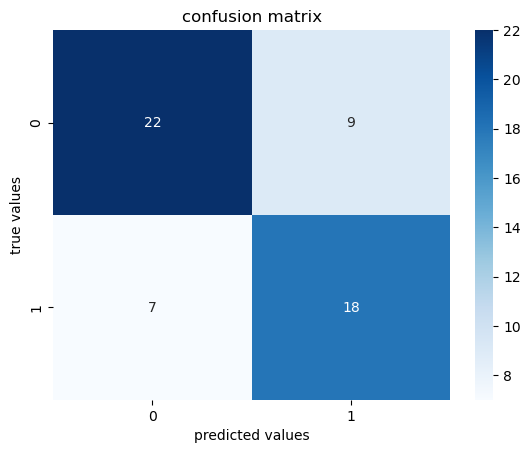

In [225]:
#visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

In [226]:
from xgboost import XGBClassifier
model2=XGBClassifier()
model2.fit(X_train_f,Y_train_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [232]:
y_predicted=model2.predict(X_test_f)
print(f"accuracy of model is: {model2.score(X_test_f,Y_test_f)}")

accuracy of model is: 0.7678571428571429


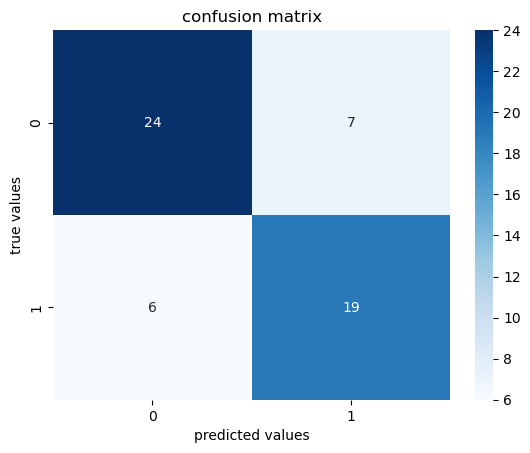

In [233]:
import pandas as pd
df_out=pd.DataFrame(zip(Y_test_f,y_predicted),columns=['original','predicted'])
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(df_out['original'],df_out['predicted'])
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt='.0f',cmap='Blues');
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title("confusion matrix");

In [235]:

im = Image.open('C:\\Users\\HP\\Desktop\\4.png')
im=im.resize((200,200))
im = np.array(im)
new_im=np.array(Image.fromarray(im))/255.0

In [236]:
new_im.shape
x_test=new_im.reshape(1,-1)

In [237]:
x_test.shape

(1, 40000)

In [238]:
model2.predict(x_test)

array([0])